In [531]:
# INDEX: 
#     Indicators: 
#  HTS_TST - currently receiving counseling/HIV treatment
#  HTS_TST_POS - newly tested positives 
#  TX_Curr/NEW - Currently/Newly receing ART
#  TX_RET - retained in ART treatment after 12 months
#  TX_PVLS - VIral load documentation

#     Databases: 
#         d1_4 - Testing and Treatment results by AGE and SEX

import boto3 
# s3.list_objects_v2(Bucket='us-aid')

In [532]:
# s3.list_objects_v2(Bucket='us-aid')
# s3.download_file('us-aid', 'csv/d1_1_Geography Analysis - Operating Unit.csv', 'd1_1_Geography Analysis - Operating Unit.csv' )
# s3.download_file('us-aid', 'csv/d1_2_Geography Analysis - Sub-National Unit.csv', 'd1_2_Geography Analysis - Sub-National Unit.csv' )
# s3.download_file('us-aid', 'csv/d1_3_Testing and Treatment - Quarterly Results.csv', 'd1_3_Testing and Treatment - Quarterly Results.csv' )
# s3.download_file('us-aid', 'csv/d1_4_Testing and Treatment - Results by Age and Sex.csv', 'd1_4_Testing and Treatment - Results by Age and Sex.csv' )
# s3.download_file('us-aid', 'csv/d1_6_Partner Performance.csv', 'd1_6_Partner Performance.csv' )
# s3.download_file('us-aid', 'csv/d1_7_Site Performance.csv', 'd1_7_Site Performance.csv' )


In [533]:
import pandas as pd
import numpy as np
# import torch
# import torch.nn as nn
path=r'/Users/bhatiat/Desktop/Data Science/USAID/Excercise 2/'
import matplotlib.pyplot as plt

In [534]:
#Cleaning d1 datasets for Malawi
#
indicator_valid = ['TX_NEW', 'TX_CURR', 'HTS_TST', 'HTS_TST_POS', 'KP_PREV', 'PP_PREV']
pd.set_option('display.max_columns', 999)
d1_4 = pd.read_csv('d1_4_Testing and Treatment - Results by Age and Sex.csv', thousands = ',')
operating_unit4 = d1_4[(d1_4['Operating Unit'] != 'Malawi')| (d1_4['Indicator'] != 'TX_NEW') & (d1_4['Indicator'] != 'HTS_TST_POS') & (d1_4['Indicator'] != 'HTS_TST') & (d1_4['Indicator'] != 'TX_CURR') ].index
d1_4.drop(operating_unit4 , inplace=True)

d1_3 = pd.read_csv('d1_3_Testing and Treatment - Quarterly Results.csv', thousands = ',')
operating_unit3 = d1_3[(d1_3['Operating Unit'] != 'Malawi')| (d1_3['Indicator'] != 'TX_NEW') & (d1_3['Indicator'] != 'HTS_TST_POS') & (d1_3['Indicator'] != 'HTS_TST') & (d1_3['Indicator'] != 'TX_CURR') ].index
d1_3.drop(operating_unit3 , inplace=True)

d1_2 = pd.read_csv('d1_2_Geography Analysis - Sub-National Unit.csv', thousands = ',')
operating_unit2 = d1_2[(d1_2['Operating Unit'] != 'Malawi')| (d1_2['Indicator'] != 'TX_NEW') & (d1_2['Indicator'] != 'HTS_TST_POS') & (d1_2['Indicator'] != 'HTS_TST') & (d1_2['Indicator'] != 'TX_CURR')].index
d1_2.drop(operating_unit2 , inplace=True)

d1_1 = pd.read_csv('d1_1_Geography Analysis - Operating Unit.csv', thousands = ',')
operating_unit1 = d1_1[(d1_1['Operating Unit'] != 'Malawi') | (d1_1['Indicator'] != 'TX_NEW') & (d1_1['Indicator'] != 'HTS_TST_POS') & (d1_1['Indicator'] != 'HTS_TST') & (d1_1['Indicator'] != 'TX_CURR') ].index
d1_1.drop(operating_unit1 , inplace=True)

d1_6 = pd.read_csv('d1_6_Partner Performance.csv', thousands = ',')
operating_unit6 = d1_6[(d1_6['Operating Unit'] != 'Malawi') | (d1_6['Indicator'] != 'TX_NEW') & (d1_6['Indicator'] != 'HTS_TST_POS') & (d1_6['Indicator'] != 'HTS_TST') & (d1_6['Indicator'] != 'TX_CURR') ].index
d1_6.drop(operating_unit6 , inplace=True)

d1_7 = pd.read_csv('d1_7_Site Performance.csv', thousands = ',')
operating_unit7 = d1_7[(d1_7['Operating Unit'] != 'Malawi')].index
d1_7.drop(operating_unit7 , inplace=True)

In [535]:
d1_6

,Unnamed: 0,Report Name,Operating Unit,PSNU,Implementing Partner,Funding Agency,Indicator,Description,2016-T,2016Q1-R,2016Q2-R,2016Q3-R,2016Q4-R,2017-T,2017Q1-R,2017Q2-R,2017Q3-R,2017Q4-R,2018-T,2018Q1-R,2018Q2-R,2018Q3-R,2018Q4-R,2019-T,2019Q1-R,2019Q2-R,2019Q3-R,Performance 2016,Performance 2017,Performance 2018,Performance 2019
0,44039,6. Partner Performance,Malawi,Balaka District,Partner 0303d,USAID,HTS_TST,People receiving testing and counseling services,NaN,NaN,NaN,NaN,NaN,4967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44040,6. Partner Performance,Malawi,Balaka District,Partner 0303d,USAID,HTS_TST_POS,People newly testing positive for HIV,NaN,NaN,NaN,NaN,NaN,335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44043,6. Partner Performance,Malawi,Balaka District,Partner 36717,HHS/CDC,HTS_TST,People receiving testing and counseling services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6589.0,121.0,1037.0,879.0,NaN,NaN,NaN,41.220216
3,44044,6. Partner Performance,Malawi,Balaka District,Partner 36717,HHS/CDC,HTS_TST_POS,People newly testing positive for HIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472.0,10.0,49.0,29.0,NaN,NaN,NaN,24.858757
4,44052,6. Partner Performance,Malawi,Balaka District,Partner 36717,HHS/CDC,TX_CURR,People currently receiving ART,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,44053,6. Partner Performance,Malawi,Balaka District,Partner 36717,HHS/CDC,TX_NEW,People newly enrolled on ART,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.0,NaN,19.0,16.0,NaN,NaN,NaN,NaN
6,44058,6. Partner Performance,Malawi,Balaka District,Partner 3e104,USAID,HTS_TST,People receiving testing and counseling services,NaN,NaN,NaN,NaN,NaN,40484.0,17918.0,19864.0,22100.0,23412.0,84510.0,20309.0,25979.0,25533.0,NaN,NaN,NaN,NaN,NaN,NaN,205.745480,NaN,NaN
7,44059,6. Partner Performance,Malawi,Balaka District,Partner 3e104,USAID,HTS_TST_POS,People newly testing positive for HIV,NaN,NaN,NaN,NaN,NaN,2606.0,NaN,NaN,NaN,NaN,3409.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,44068,6. Partner Performance,Malawi,Balaka District,Partner 3e104,USAID,TX_CURR,People currently receiving ART,NaN,NaN,NaN,NaN,NaN,14844.0,15335.0,15417.0,15737.0,16290.0,18537.0,16866.0,17284.0,17600.0,NaN,NaN,NaN,NaN,NaN,NaN,422.925088,NaN,NaN
9,44070,6. Partner Performance,Malawi,Balaka District,Partner 3e104,USAID,TX_NEW,People newly enrolled on ART,NaN,NaN,NaN,NaN,NaN,2028.0,677.0,851.0,855.0,731.0,3258.0,787.0,904.0,790.0,NaN,NaN,NaN,NaN,NaN,NaN,153.550296,NaN,NaN


In [536]:
# Partners Dataset: Performance by partners = (Recorded)/Target 
# Important Note: QUARTER 4 2019 not available so performance measured by 3/4 of target

for col in ['2016-T', '2016Q1-R',
       '2016Q2-R', '2016Q3-R', '2016Q4-R', '2017-T', '2017Q1-R', '2017Q2-R',
       '2017Q3-R', '2017Q4-R', '2018-T', '2018Q1-R', '2018Q2-R', '2018Q3-R',
       '2018Q4-R', '2019-T', '2019Q1-R', '2019Q2-R', '2019Q3-R']:
        d1_6[col] = d1_6[col].astype('str').astype(float)

d1_6['Performance 2016'] = (d1_6['2016Q1-R'] + d1_6['2016Q2-R'] + d1_6['2016Q3-R'] + d1_6['2016Q4-R'])/(d1_6['2016-T'])*100
d1_6['Performance 2017'] = (d1_6['2017Q1-R'] + d1_6['2017Q2-R'] + d1_6['2017Q3-R'] + d1_6['2017Q4-R'])/(d1_6['2017-T'])*100
d1_6['Performance 2018'] = (d1_6['2018Q1-R'] + d1_6['2018Q2-R'] + d1_6['2018Q3-R'] + d1_6['2018Q4-R'])/(d1_6['2018-T'])*100
d1_6['Performance 2019'] = (d1_6['2019Q1-R'] + d1_6['2019Q2-R'] + d1_6['2019Q3-R'])/(d1_6['2019-T']*.75)*100


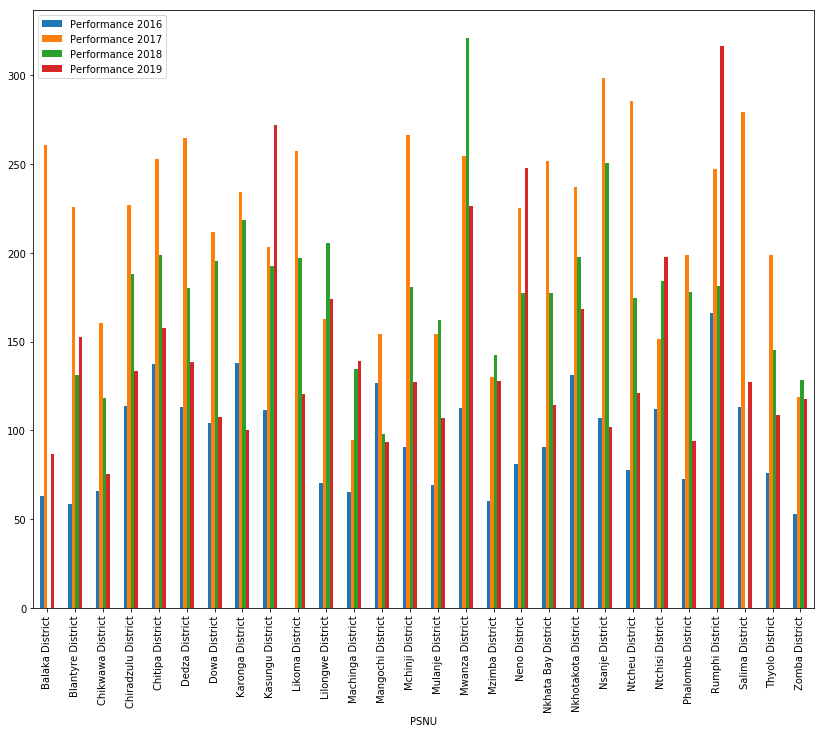

In [537]:
# d1_6.groupby(['Implementing Partner'])['Performance 2017','Performance 2018','Performance 2019'].sum()
# IDEA TO FIND Best partners
d1_6.groupby(['PSNU'])['Performance 2016','Performance 2017','Performance 2018','Performance 2019'].mean().plot(kind='bar',subplots=False, figsize = (14,11))


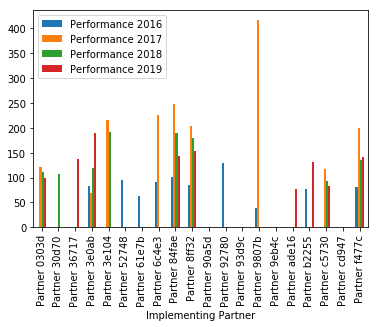

In [538]:
d1_6.groupby(['Implementing Partner'])['Performance 2016','Performance 2017',
                                       'Performance 2018','Performance 2019'].mean().plot(kind='bar')

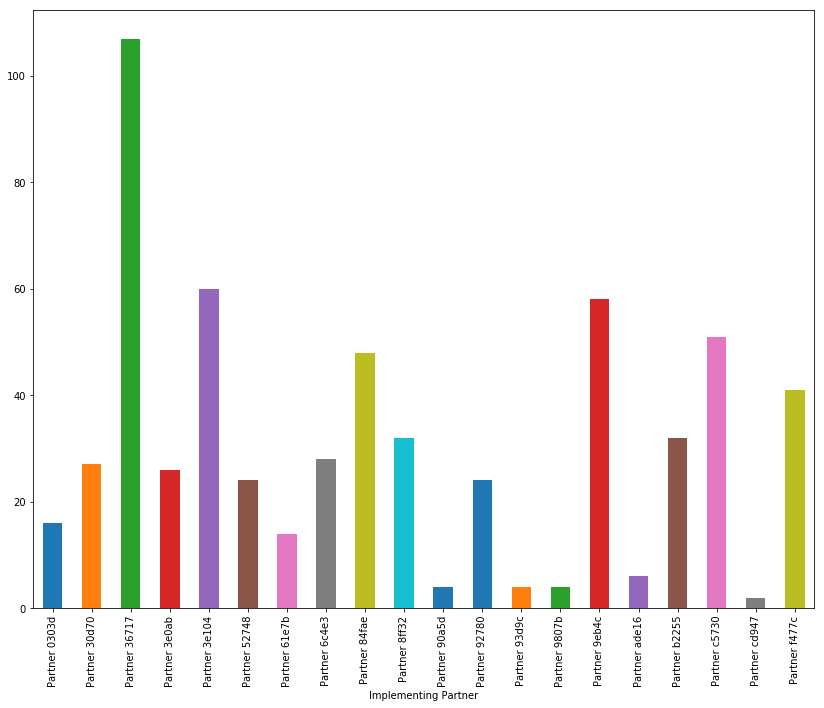

In [539]:
d1_6.groupby(['Implementing Partner'])['PSNU'].count().plot(kind='bar', figsize = (14,11))

In [540]:
#measuring performance per PSNU in d1_2
for col in ['2016-T', '2016Q1-R',
       '2016Q2-R', '2016Q3-R', '2016Q4-R', '2017-T', '2017Q1-R', '2017Q2-R',
       '2017Q3-R', '2017Q4-R', '2018-T', '2018Q1-R', '2018Q2-R', '2018Q3-R',
       '2018Q4-R', '2019-T', '2019Q1-R', '2019Q2-R', '2019Q3-R']:
        d1_2[col] = d1_2[col].astype('str').astype(float)
        
d1_2['Performance 2016'] = (d1_2['2016Q1-R'] + d1_2['2016Q2-R'] + d1_2['2016Q3-R'] + d1_2['2016Q4-R'])/(d1_2['2016-T'])*100        
d1_2['Performance 2017'] = (d1_2['2017Q1-R'] + d1_2['2017Q2-R'] + d1_2['2017Q3-R'] + d1_2['2017Q4-R'])/(d1_2['2017-T'])*100
d1_2['Performance 2018'] = (d1_2['2018Q1-R'] + d1_2['2018Q2-R'] + d1_2['2018Q3-R'] + d1_2['2018Q4-R'])/(d1_2['2018-T'])*100
d1_2['Performance 2019'] = (d1_2['2019Q1-R'] + d1_2['2019Q2-R'] + d1_2['2019Q3-R'])/(d1_2['2019-T']*.75)*100


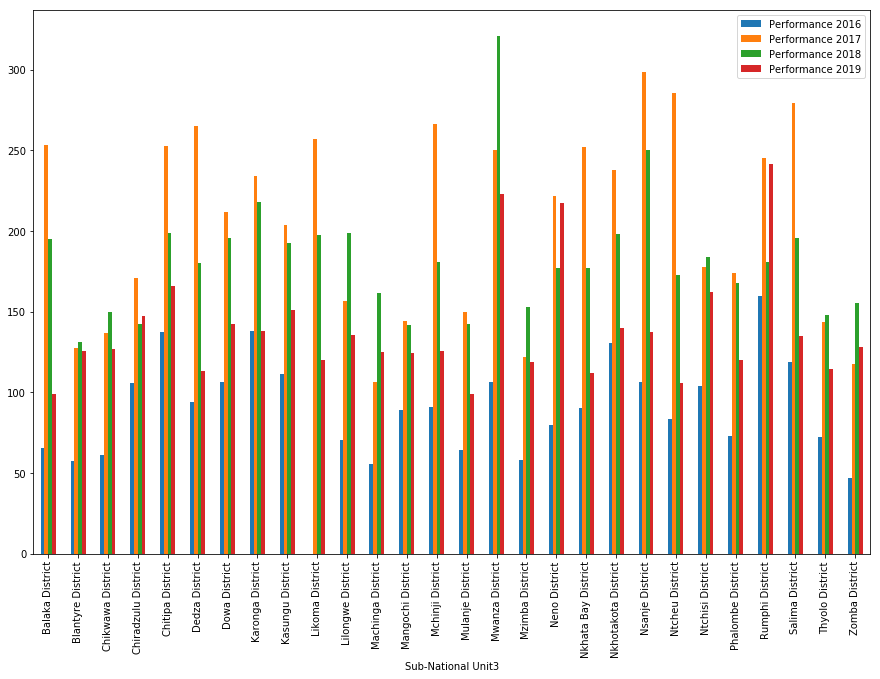

In [541]:
d1_2.groupby(['Sub-National Unit3'])['Performance 2016','Performance 2017','Performance 2018','Performance 2019'].mean().plot(kind='bar', figsize=(15,10))

In [542]:
# d2_1 = pd.read_csv('../d2_Sub-National Program Disaggregated Results 2015-2016.csv')
# d2_1 = d2_1[['Year', 'Country/Region', 'SNU', 'Indicator', 'MeasureName','MeasureValue','IndicatorType',
#              'Bundle','Category', 'Sex','Positivity', 'KP', 'Cadre', 'Known/New']].astype(str)
# d2_1[['Year', 'MeasureValue']] = d2_1[['Year', 'MeasureValue']].astype(int)

In [543]:
# Ran all files to clean and saved them locally in d1_pepfar_datasets to have uni versality. d1_7.to_csv(path + 'd1_7_Site Performance.csv')

In [544]:
d1_4.to_csv('../d1_4_performance')

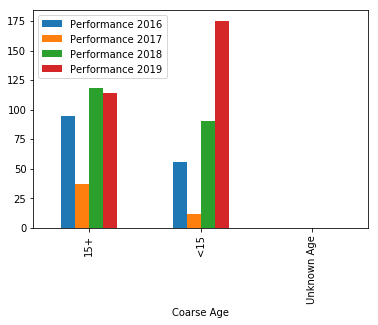

In [545]:
d1_4['Performance 2016'] = (d1_4['2016Q1-R'] + d1_4['2016Q2-R'] + d1_4['2016Q3-R'] + d1_4['2016Q4-R'])/(d1_4['2016-T'])*100        
d1_4['Performance 2017'] = (d1_4['2017Q1-R'] + d1_4['2017Q2-R'] + d1_4['2017Q3-R'] + d1_4['2017Q4-R'])/(d1_4['2017-T'])*100
d1_4['Performance 2018'] = (d1_4['2018Q1-R'] + d1_4['2018Q2-R'] + d1_4['2018Q3-R'] + d1_4['2018Q4-R'])/(d1_4['2018-T'])*100
d1_4['Performance 2019'] = (d1_4['2019Q1-R'] + d1_4['2019Q2-R'] + d1_4['2019Q3-R'])/(d1_4['2019-T']*.75)*100


d1_4.groupby(['Coarse Age'])['Performance 2016','Performance 2017','Performance 2018','Performance 2019'].mean().plot(kind = 'bar')

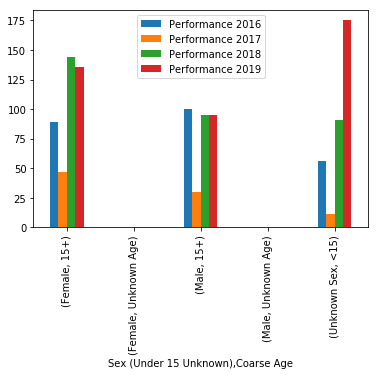

In [546]:
# d1_4['Average Performance'] = d1_4[['Performance 2016','Performance 2017','Performance 2018','Performance 2019']].mean(axis=1)



d1_4.groupby(['Sex (Under 15 Unknown)', 'Coarse Age'])['Performance 2016','Performance 2017','Performance 2018','Performance 2019'].mean().plot(kind = 'bar')

In [547]:
# d1_4_visual = d1_4.groupby(['Sub-National Unit2','Sex (Under 15 Unknown)'])['Performance 2016','Performance 2017','Performance 2018','Performance 2019'].mean().plot(figsize=(20,20))

# d1_4_visual = d1_4_visual.T
# d1_4_visual
#d1_4_visual.groupby(['Performance 2016','Performance 2017','Performance 2018','Performance 2019'])['Sex (Under 15 Unknown)']
# d1_4_visual.plot(subplots=True, figsize=(10,20))


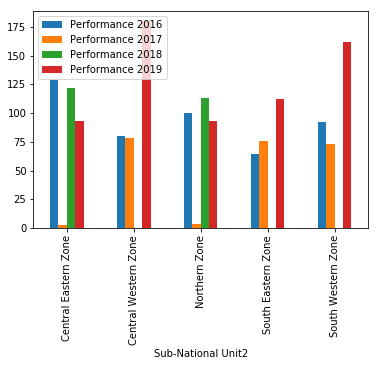

In [548]:
#Females performance per sector!!
d1_4f = d1_4.loc[d1_4['Sex (Under 15 Unknown)'] == 'Female']
d1_4f.groupby(['Sub-National Unit2'])['Performance 2016','Performance 2017', 'Performance 2018', 'Performance 2019'].mean().plot(kind='bar')

In [552]:
# d1_7.to_csv('d1_7_performance')
d1_2.head()

,Unnamed: 0,Report Name,Operating Unit,Sub-National Unit1,Sub-National Unit2,Sub-National Unit3,Indicator,Description,2016-T,2016Q1-R,2016Q2-R,2016Q3-R,2016Q4-R,2017-T,2017Q1-R,2017Q2-R,2017Q3-R,2017Q4-R,2018-T,2018Q1-R,2018Q2-R,2018Q3-R,2018Q4-R,2019-T,2019Q1-R,2019Q2-R,2019Q3-R,Performance 2016,Performance 2017,Performance 2018,Performance 2019
0,64875,2. Geography Analysis - Sub-National Unit,Malawi,Central Region,Central Eastern Zone,Ntchisi District,HTS_TST,People receiving testing and counseling services,18359.0,5895.0,6966.0,6692.0,7464.0,25602.0,7331.0,8614.0,8126.0,8267.0,32433.0,7698.0,10034.0,11432.0,14173.0,12930.0,2380.0,14066.0,15004.0,147.159431,126.310444,133.620078,324.310389
1,64876,2. Geography Analysis - Sub-National Unit,Malawi,Central Region,Central Eastern Zone,Ntchisi District,HTS_TST_POS,People newly testing positive for HIV,594.0,107.0,174.0,140.0,119.0,463.0,0.0,1.0,1.0,7.0,703.0,NaN,NaN,NaN,NaN,480.0,15.0,147.0,140.0,90.909091,1.943844,NaN,83.888889
2,64889,2. Geography Analysis - Sub-National Unit,Malawi,Central Region,Central Eastern Zone,Ntchisi District,TX_CURR,People currently receiving ART,2861.0,NaN,2567.0,NaN,2767.0,2504.0,2717.0,2917.0,2913.0,2962.0,3407.0,2948.0,3029.0,3055.0,3104.0,5107.0,1961.0,1999.0,2015.0,NaN,459.624601,356.207807,155.995039
3,64891,2. Geography Analysis - Sub-National Unit,Malawi,Central Region,Central Eastern Zone,Ntchisi District,TX_NEW,People newly enrolled on ART,533.0,83.0,86.0,101.0,128.0,329.0,111.0,127.0,73.0,94.0,664.0,80.0,111.0,118.0,103.0,505.0,64.0,129.0,128.0,74.671670,123.100304,62.048193,84.752475
4,64895,2. Geography Analysis - Sub-National Unit,Malawi,Central Region,Central Eastern Zone,Kasungu District,HTS_TST,People receiving testing and counseling services,59861.0,14731.0,18919.0,21135.0,19904.0,65721.0,17399.0,20041.0,21820.0,28712.0,106853.0,30481.0,40240.0,33559.0,31965.0,43732.0,5559.0,41183.0,39968.0,124.770719,133.856758,127.506949,264.367816


In [569]:
d1_2_district = d1_2.groupby(['Sub-National Unit2'])['Sub-National Unit3'].unique()
d1_2_district.to_csv('d1_2_district')